# Importing necessary modules



In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Loading Data 

Data from Kaggle and is from the PJM East Region: 2001-2018 (PJME)


<AxesSubplot:title={'center':'PJME hourly consumption'}, xlabel='Datetime'>

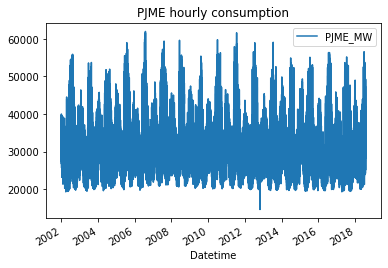

In [28]:
df = pd.read_csv("PJME_hourly.csv")
df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)
df.plot(title = "PJME hourly consumption")

# Removing outliers

In [6]:
df = df.sort_values(by='PJME_MW', ascending=True)
Q1 = np.quantile(df,0.25)
Q3 = np.quantile(df,0.75)
IQR = Q3 - Q1 
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

cleaned_df = df[(df.PJME_MW >= lower_limit ) & (df.PJME_MW <= upper_limit)]
cleaned_df = cleaned_df.sort_values(by = "Datetime")


# Feature Creation

In [29]:
def feature_creation(x):
    x = x.copy()
    x["Hour"] = x.index.hour
    x["Month"] = x.index.month
    x["Year"] = x.index.year
    return x

cleaned_df = feature_creation(cleaned_df)


# TimeSeriesSplit

In [34]:
tss = TimeSeriesSplit(n_splits= 5, test_size= 8760, gap = 24)
cleaned_df = cleaned_df.sort_index()

fold = 0
predictions = []
scores = []

for train_index , val_index in tss.split(cleaned_df):
    train = cleaned_df.iloc[train_index]
    test = cleaned_df.iloc[val_index]

    train = feature_creation(train)
    test = feature_creation(test)

    features = ["Hour", "Month", "Year"]
    target = "PJME_MW"
    X_train = train[features]
    Y_train = train[target]
    X_test = test[features]
    Y_test = test[target]

    xgb_regressor = xgb.XGBRegressor(base_score=0.5, booster='gbtree' ,n_estimators=1000, early_stopping_rounds=50, objective='reg:linear', max_depth=3, learning_rate=0.01)
    xgb_regressor.fit(X_train, Y_train, eval_set=[(X_train, Y_train), (X_test, Y_test)], verbose=100)

    y_predictions = xgb_regressor.predict(X_test)
    predictions.append(y_predictions)
    score = np.sqrt(mean_squared_error(Y_test, y_predictions))
    scores.append(score)

[0]	validation_0-rmse:32044.07992	validation_1-rmse:31924.94191


/Users/shantanusharma/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:51:54] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12292.56869	validation_1-rmse:12238.59233
[200]	validation_0-rmse:5691.60720	validation_1-rmse:5866.93739
[300]	validation_0-rmse:3910.79534	validation_1-rmse:4376.87098
[400]	validation_0-rmse:3527.58699	validation_1-rmse:4103.24846
[500]	validation_0-rmse:3421.65821	validation_1-rmse:4040.64986
[600]	validation_0-rmse:3371.75732	validation_1-rmse:4010.76956
[700]	validation_0-rmse:3342.83145	validation_1-rmse:3998.01322
[800]	validation_0-rmse:3321.30378	validation_1-rmse:3988.25232
[900]	validation_0-rmse:3303.20159	validation_1-rmse:3970.08132
[999]	validation_0-rmse:3289.93455	validation_1-rmse:3963.02291
[0]	validation_0-rmse:32033.57119	validation_1-rmse:31783.98220


/Users/shantanusharma/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:52:03] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12303.53754	validation_1-rmse:12056.48460
[200]	validation_0-rmse:5722.91082	validation_1-rmse:5662.36028
[300]	validation_0-rmse:3945.08667	validation_1-rmse:4195.00768
[400]	validation_0-rmse:3569.04710	validation_1-rmse:3896.32717
[500]	validation_0-rmse:3466.88180	validation_1-rmse:3826.29022
[600]	validation_0-rmse:3423.60703	validation_1-rmse:3796.98047
[700]	validation_0-rmse:3396.72914	validation_1-rmse:3776.24818
[800]	validation_0-rmse:3375.41984	validation_1-rmse:3754.80105
[900]	validation_0-rmse:3360.63212	validation_1-rmse:3745.03255
[999]	validation_0-rmse:3347.30236	validation_1-rmse:3732.74351
[0]	validation_0-rmse:32016.67827	validation_1-rmse:30610.20419


/Users/shantanusharma/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:52:13] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12309.86563	validation_1-rmse:10942.25279
[200]	validation_0-rmse:5738.52478	validation_1-rmse:4769.57120
[300]	validation_0-rmse:3972.42860	validation_1-rmse:3752.76013
[379]	validation_0-rmse:3627.57165	validation_1-rmse:3752.51320
[0]	validation_0-rmse:31920.25936	validation_1-rmse:31053.78922


/Users/shantanusharma/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:52:16] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12282.22455	validation_1-rmse:11532.82273
[200]	validation_0-rmse:5742.80586	validation_1-rmse:5360.77040
[300]	validation_0-rmse:3990.17144	validation_1-rmse:4092.79854
[400]	validation_0-rmse:3612.73150	validation_1-rmse:3889.64953
[500]	validation_0-rmse:3513.22623	validation_1-rmse:3836.33163
[600]	validation_0-rmse:3463.78912	validation_1-rmse:3799.26193
[700]	validation_0-rmse:3432.76878	validation_1-rmse:3786.12411
[800]	validation_0-rmse:3409.72379	validation_1-rmse:3778.61856
[815]	validation_0-rmse:3407.22294	validation_1-rmse:3779.52682
[0]	validation_0-rmse:31865.39478	validation_1-rmse:31213.08990


/Users/shantanusharma/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:52:29] WARNING: /Users/runner/work/xgboost/xgboost/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[100]	validation_0-rmse:12269.20116	validation_1-rmse:11689.07982
[200]	validation_0-rmse:5750.48988	validation_1-rmse:5493.21979
[300]	validation_0-rmse:4003.06735	validation_1-rmse:4171.32521
[400]	validation_0-rmse:3627.44905	validation_1-rmse:3965.23346
[500]	validation_0-rmse:3519.88580	validation_1-rmse:3931.67572
[579]	validation_0-rmse:3481.83510	validation_1-rmse:3933.46966


In [40]:
#Mean RMSE
np.mean(scores)

3824.5782506591304